## Notebook to create a new glorys file with different time values

In [33]:
import xarray as xr

In [34]:
glorys_og_og = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/code/model2roms/input/glorys.nc')

In [36]:
# Only select 4 years for now fixing the lateral forcing

glorys_short = glorys_og_og.where(glorys_og_og.time.dt.year < 1997, drop = True)

In [14]:
# Import Tim's data
glorys_bry = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/code/model2roms2/output/NorthSea4_bry_GLORYS_19930116_to_20191216.nc')


In [39]:
# Only select 4 years for now fixing the lateral forcing

glorys_bry_short = glorys_bry.where(glorys_bry.ocean_time.dt.year <1997, drop = True)

In [40]:
glorys_bry_short

<xarray.Dataset>
Dimensions:     (eta_u: 110, xi_u: 121, ocean_time: 48, eta_v: 109, xi_v: 122, eta_psi: 109, xi_psi: 121, eta_rho: 110, xi_rho: 122, s_rho: 30, s_w: 31)
Coordinates:
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w         (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
  * ocean_time  (ocean_time) datetime64[ns] 1993-01-15 1993-02-15 ... 1996-12-15
Dimensions without coordinates: eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi, eta_rho, xi_rho
Data variables: (12/43)
    lon_u       (eta_u, xi_u, ocean_time) float64 -19.75 -19.75 ... 9.754 9.754
    lat_u       (eta_u, xi_u, ocean_time) float64 35.95 35.95 ... 61.91 61.91
    lon_v       (eta_v, xi_v, ocean_time) float64 -19.88 -19.88 ... 9.877 9.877
    lat_v       (eta_v, xi_v, ocean_time) float64 36.1 36.1 36.1 ... 61.82 61.82
    lat_psi     (eta_psi, xi_psi, ocean_time) float64 36.1 36.1 ... 61.82 61.82
    lon_psi     (eta_psi, xi_psi, ocean_time) float64 -19.75 -19.75 ... 9.754
    ...          ...
    vbar_south  (ocean_time, xi_v) float32 nan nan nan nan ... nan nan nan nan
    vbar_north  (ocean_time, xi_v) float32 0.01128 0.01125 0.01124 ... nan nan
    ubar_west   (ocean_time, eta_u) float32 nan nan nan ... -0.009622 -0.01111
    ubar_east   (ocean_time, eta_u) float32 nan nan nan nan ... nan nan nan nan
    ubar_south  (ocean_time, xi_u) float32 nan -0.01064 -0.01044 ... nan nan nan
    ubar_north  (ocean_time, xi_u) float32 -0.01111 -0.01038 ... nan nan
Attributes:
    title:        Boundary forcing file (BRY) used for forcing of the ROMS model
    description:  Created for the /Users/iriskeizer/Documents/ROMS/code/model...
    grdFile:      /Users/iriskeizer/Documents/ROMS/code/model2roms2/NorthSea4...
    history:      Created Fri Aug 12 17:57:18 2022
    source:       iris keizer (iris.keizer (at) knmi.nl)
    type:         File in NETCDF4 format created using MODEL2ROMS
    link:         https://github.com/trondkr/model2roms
    Conventions:  CF-1.0

In [41]:
glorys_short['time'] = glorys_bry_short.ocean_time

In [42]:
glorys_short = glorys_short.fillna(-1.e20)

In [43]:
glorys_short

<xarray.Dataset>
Dimensions:     (time: 48, depth: 50, latitude: 409, longitude: 457, ocean_time: 48)
Coordinates:
    time        (ocean_time) datetime64[ns] 1993-01-15 1993-02-15 ... 1996-12-15
  * depth       (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude    (latitude) float32 32.0 32.08 32.17 32.25 ... 65.83 65.92 66.0
  * longitude   (longitude) float32 -24.0 -23.92 -23.83 ... 13.83 13.92 14.0
  * ocean_time  (ocean_time) datetime64[ns] 1993-01-15 1993-02-15 ... 1996-12-15
Data variables:
    so          (time, depth, latitude, longitude) float32 36.81 ... -1e+20
    thetao      (time, depth, latitude, longitude) float32 19.33 ... -1e+20
    uo          (time, depth, latitude, longitude) float32 0.02441 ... -1e+20
    vo          (time, depth, latitude, longitude) float32 -0.08301 ... -1e+20
    zos         (time, latitude, longitude) float32 -0.09156 -0.09644 ... -1e+20
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

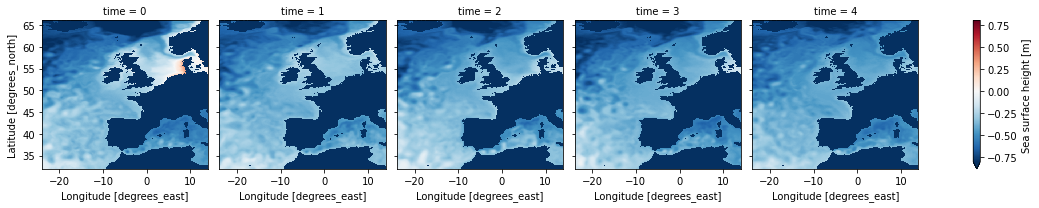

In [46]:
glorys_short.zos.isel(time = [0,10,20,30,40]).plot(col = 'time', vmin = -0.8)

In [47]:
glorys_short.to_netcdf('/Users/iriskeizer/Documents/ROMS/code/model2roms2/glorys.nc')

## Oké ik heb nu glorys.nc data dezelfde tijd gegeven als de lateral forcing output